# Load Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score


# Load Data
data =pd.read_csv('https://drive.google.com/uc?id=1-IPjL7WS4lXgYWL7mnmykZ_Z_rvKcolL', header=0)



# Drop the first two features and separate features and labels
X = data.iloc[:, 2:-1].values  # Features (drop first two and last column for features)
y = data.iloc[:, -1].values   # Target (25th feature)


# Train Model

In [6]:
# Convert categorical labels ('Low', 'Medium', 'High') to numerical
unique_classes = np.unique(y)
class_to_index = {cls: idx for idx, cls in enumerate(unique_classes)}
index_to_class = {idx: cls for cls, idx in class_to_index.items()}
y_numerical = np.array([class_to_index[label] for label in y])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_numerical, test_size=0.2, random_state=42)

# Initialize and train the Perceptron
model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=list(unique_classes)))


Accuracy: 0.885

Classification Report:
              precision    recall  f1-score   support

        High       0.99      0.95      0.97        82
         Low       0.95      0.71      0.81        55
      Medium       0.75      0.95      0.84        63

    accuracy                           0.89       200
   macro avg       0.90      0.87      0.87       200
weighted avg       0.90      0.89      0.89       200



# Plot

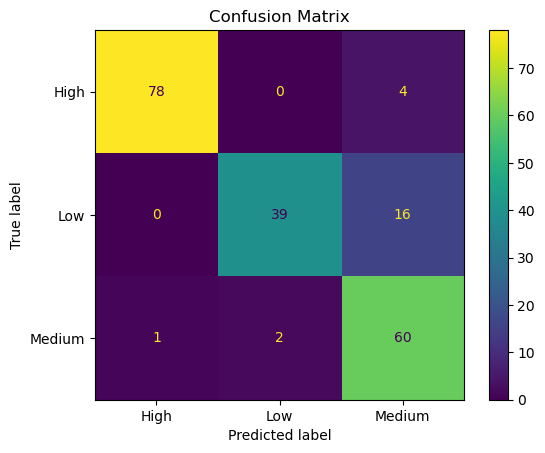

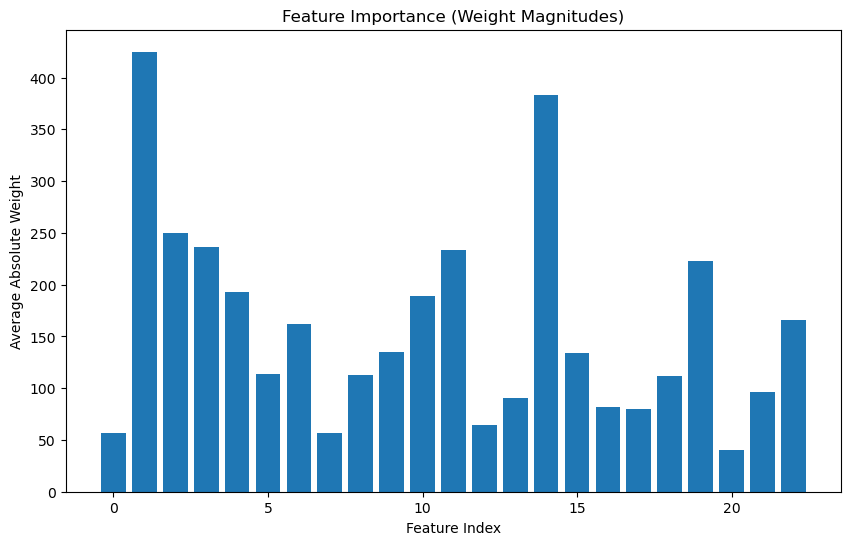

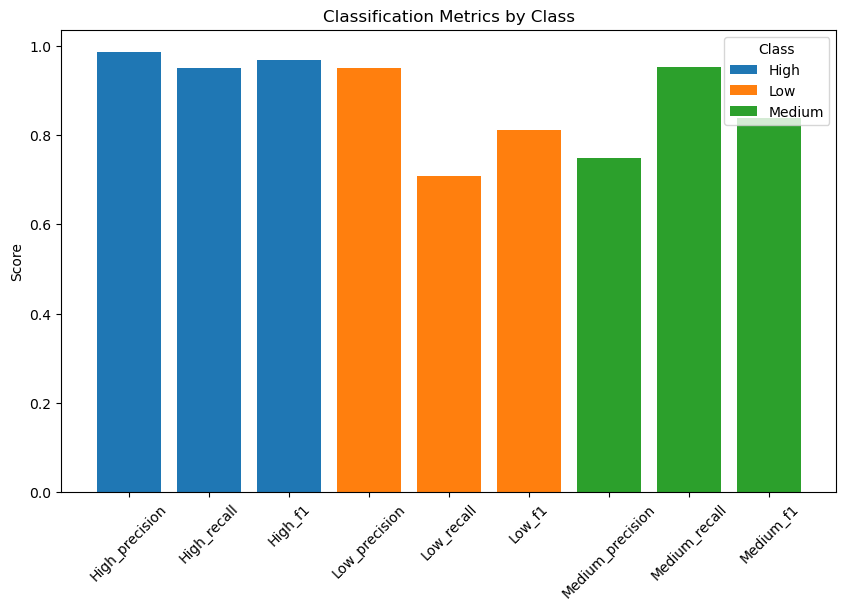

In [7]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
disp.plot(cmap="viridis")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance Visualization (Weight Magnitudes)
plt.figure(figsize=(10, 6))
weights = np.abs(model.coef_).mean(axis=0)
plt.bar(range(len(weights)), weights)
plt.title("Feature Importance (Weight Magnitudes)")
plt.xlabel("Feature Index")
plt.ylabel("Average Absolute Weight")
plt.show()

# Classification Report as a Bar Chart
report = classification_report(y_test, y_pred, target_names=list(unique_classes), output_dict=True)
plt.figure(figsize=(10, 6))

for metric, values in report.items():
    if metric in unique_classes:  # Skip 'accuracy' or averages
        plt.bar(
            [metric + "_precision", metric + "_recall", metric + "_f1"],
            [values["precision"], values["recall"], values["f1-score"]],
            label=metric,
        )

plt.title("Classification Metrics by Class")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Class")
plt.show()